In [131]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [132]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [133]:
train_split_int = []

for i in range(10):
    train_split_int.append(X_train[y_train == i])

In [134]:
# take avg
train_split_avg = [np.mean(x, axis=0) for x in train_split_int]

In [135]:
train_split_avg[0].shape

(28, 28)

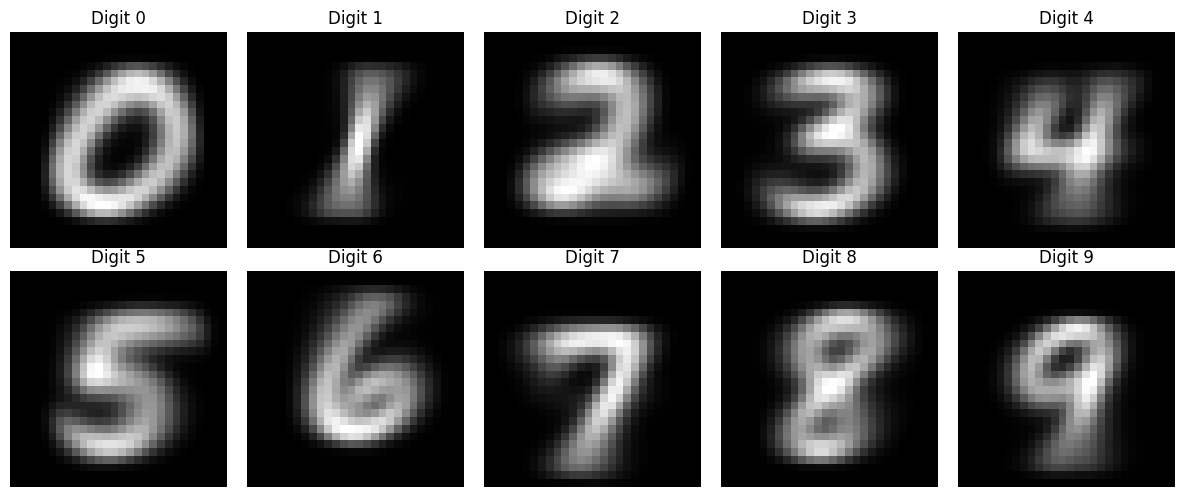

In [136]:
# show images of means of each digit's images
plt.figure(figsize=(12,5))

for i, img in enumerate(train_split_avg):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [137]:
ex_img = X_test[0]

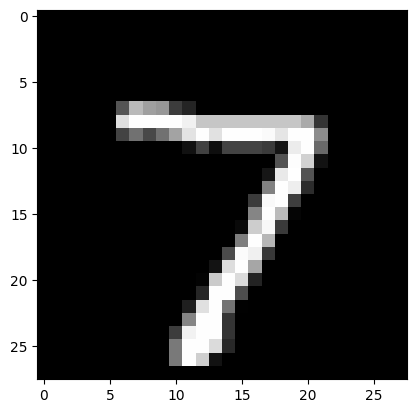

In [138]:
plt.imshow(ex_img, cmap='gray')

In [139]:
distances = np.abs(ex_img - train_split_avg)

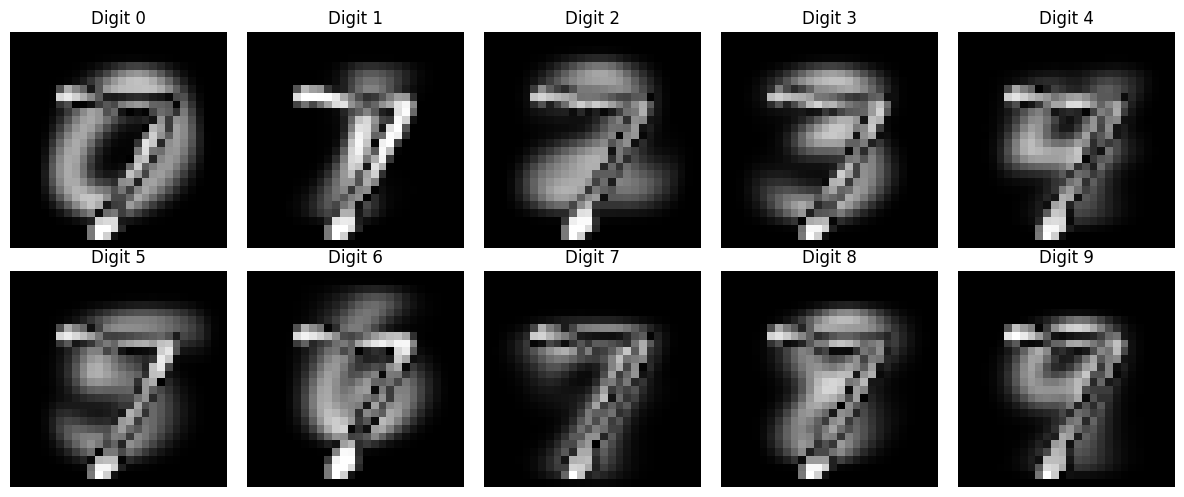

In [140]:
# show images of distances from example image to each digit mean
plt.figure(figsize=(12,5))

for i, img in enumerate(distances):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [141]:
avg_ex = np.average(distances, axis=(1,2))
avg_ex

array([0.17695039, 0.12534527, 0.16336345, 0.15374855, 0.13225792,
       0.14713395, 0.16338049, 0.08740487, 0.15276589, 0.11682996])

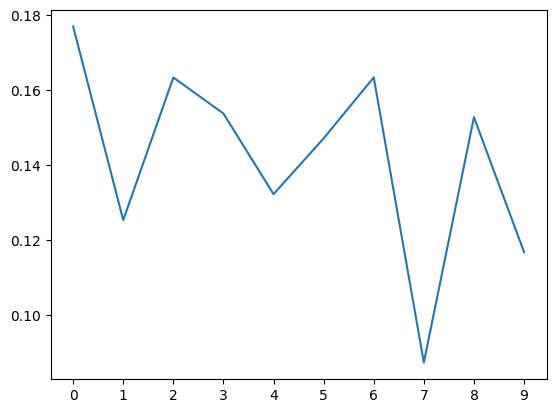

In [ ]:
plt.plot(avg_ex)
plt.xticks(range(10))
plt.show()

In [143]:
def classify(img, return_distances=False):
    pixel_distances = np.abs(img - train_split_avg)
    average_pixel_distances = np.average(pixel_distances, axis=(1,2))
    return average_pixel_distances if return_distances else np.argmin(average_pixel_distances)

In [144]:
classify(ex_img)

np.int64(7)

In [145]:
y_pred = [classify(img) for img in X_test]
len(y_pred)

10000

In [146]:
sum(np.array(y_pred) == y_test) / len(y_test)

np.float64(0.6685)